# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv("keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38763.60
The current value of your 5.3 ETH is $7133.16


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [40]:
# Format current date as ISO format
today = pd.Timestamp(date.today(), tz = "America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2021-01-26 00:00:00-05:00  117.46  117.585  117.4255  117.525  2593454   

                              SPY                                      
                             open    high     low     close    volume  
time                                                                   
2021-01-26 00:00:00-05:00  385.41  385.85  383.56  384.4411  25853545

In [41]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.525
Current SPY closing price: $384.4411


In [42]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19222.06
The current value of your 200 AGG shares is $23505.00


### Savings Health Analysis

In [43]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto_value = my_btc_value + my_eth_value
total_share_value = my_spy_value + my_agg_value

amounts = {"amount": [total_crypto_value, total_share_value]}
assets = ["crypto", "shares"]

df_savings = pd.DataFrame(amounts, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,45896.764
shares,42727.055


<AxesSubplot:title={'center':'Compositon of Personal Savings'}, ylabel='amount'>

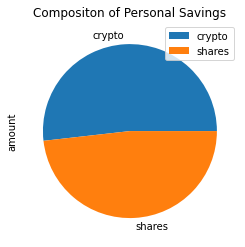

In [44]:
# Plot savings pie chart
df_savings.plot.pie(y = "amount", title = "Compositon of Personal Savings")

In [45]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_share_value

# Validate saving health
if(total_savings > emergency_fund):
    print("Congratulations! You have enough money in your emergency fund.")
elif(total_savings == emergency_fund):
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings:0.2f} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-25', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-25', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1D"

tickers = ["AGG", "SPY"]

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517  
2016-01-27 00:00:00-05:00  189.58  191.56  187.06  188.12  157060622  
2016-01-28 00:00:00-05:00  189.96  190.20  187.16  189.14  118949268  
2016-01-29 00:00:00-05:00  190.02  193.75  189.88  193.69  145410523

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   
2016-01-27 00:00:00-05:00  108.91  109.0100  108.7200  108.95  1531148   
2016-01-28 00:00:00-05:00  108.99  109.0988  108.8201  109.04  2146566   
2016-01-29 00:00:00-05:00  109.41  109.4800  109.2500  109.32  7404827   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-25 00:00:00-05:00          NaN  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   
2016-01-27 00:00:00-05:00     0.000459  189.58  191.56  187.06  188.12   
2016-01-28 00:00:00-05:00     0.000826  189.96  190.20  187.16  189.14   
2016-01-29 00:00:00-05:00     0.002568  190.02  193.75  189.88  193.69   

                                                   
                              volume daily_return  
time                                               
2016-01-25 00:00:00-05:00   99219694          NaN  
2016-01-26 00:00:00-05:00  115312517     0.013429  
2016-01-27 00:00:00-05:00  157060622    -0.010832  
2016-01-28 00:00:00-05:00  118949268     0.005422  
2016-01-29 00:00:00-05:00  145410523     0.024056

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997878,1.005607,0.996851,0.990675,1.003812,0.988194,0.994488,1.003747,0.980266,1.003106,...,1.011231,1.003580,1.004784,0.987184,0.995668,1.002588,1.009565,0.998126,0.995493,1.006924
2,0.989917,1.004572,0.986114,1.011578,1.010380,0.994645,1.000720,0.989842,0.972762,1.001252,...,1.003495,1.000953,1.014692,0.978438,0.990948,1.010066,1.011694,0.986445,0.982242,1.006690
3,0.979117,0.997355,0.976808,1.008061,1.007164,0.995545,1.004562,0.997812,0.975404,1.001620,...,0.986430,1.000085,1.018111,0.973390,0.996222,1.020293,1.010045,0.985795,0.980388,1.000650
4,0.983687,1.005174,0.981943,1.011416,1.003137,0.994438,0.997896,0.991009,0.974240,0.988290,...,0.986672,0.995118,1.023593,0.968884,0.990632,1.005962,1.009213,0.988767,0.990774,0.993104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,33.897231,8.155798,13.433557,93.066641,25.374954,24.363563,26.489469,40.042249,29.401599,38.153290,...,5.280235,12.772924,11.194744,2.552069,2.909676,12.753063,23.615648,11.493376,14.312234,18.806123
7557,33.612025,8.176658,13.250988,93.392354,25.162835,24.266303,26.515194,40.102128,29.513658,38.501484,...,5.250934,12.742171,11.281415,2.552175,2.919840,12.734054,23.871532,11.473202,14.153937,18.698395
7558,33.585556,8.262357,13.294783,93.608481,24.964732,23.850668,26.581610,40.563529,29.710125,38.771519,...,5.297024,12.693326,11.242415,2.606836,2.936028,12.823840,23.758169,11.389307,14.213483,18.522407
7559,34.115741,8.245551,13.124447,93.649737,24.939041,23.787856,26.651967,40.946792,29.295381,38.886718,...,5.342428,12.667078,11.259161,2.611518,2.964456,12.907322,23.811593,11.240278,14.066250,18.507748


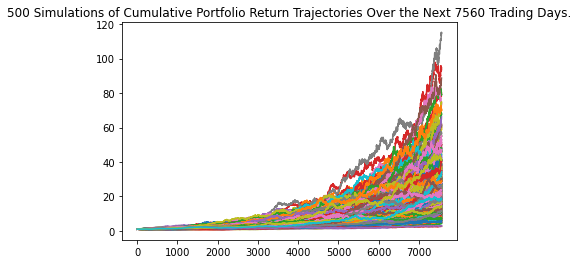

In [23]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

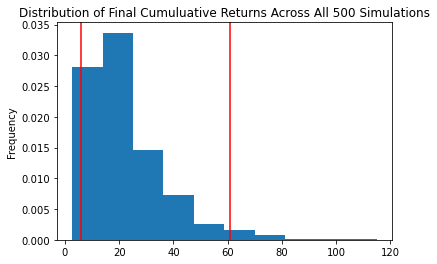

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_30yr = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_30yr)

count           500.000000
mean             22.451492
std              14.726713
min               2.627246
25%              12.464410
50%              19.247078
75%              28.287432
max             114.903090
95% CI Lower      5.828405
95% CI Upper     60.884651
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl_30yr[8]*initial_investment,2)
ci_upper = round(tbl_30yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $116568.1 and $1217693.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl_30yr[8]*initial_investment,2)
ci_upper = round(tbl_30yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $174852.15 and $1826539.54


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005178,1.006757,0.994054,0.998174,1.005185,1.010721,1.009135,0.996418,1.005540,0.995227,...,1.006925,1.018686,1.002015,0.999285,0.993474,1.002528,0.993555,0.995964,0.994834,1.018352
2,0.995041,1.010346,1.003979,0.991339,1.004947,1.011016,1.002124,0.992136,1.029962,1.007208,...,1.004542,1.023281,1.018931,0.989916,0.989836,0.988996,1.009152,0.985587,0.998832,1.012998
3,0.991350,1.002781,1.011315,0.988962,1.016264,0.999107,0.995039,0.985626,1.022415,1.002233,...,1.017058,1.020931,1.022706,0.982961,1.004591,0.989924,1.005883,0.987805,0.993182,1.022530
4,0.990772,1.000421,1.012535,0.992682,1.018947,0.997207,1.005490,0.976873,1.014648,0.994170,...,1.019265,1.029687,1.038120,0.992975,1.008526,0.996422,1.010065,0.987791,0.986135,1.017647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.464773,2.784139,2.223916,1.760898,1.990858,1.616908,1.639068,1.841301,1.962421,1.717092,...,1.786045,2.001582,2.285497,1.014167,1.562571,2.172195,1.435121,1.253844,1.569321,1.654506
1257,1.474683,2.777089,2.219977,1.756671,1.974705,1.590367,1.627851,1.863189,1.958348,1.718890,...,1.766908,1.993943,2.291942,1.006482,1.550546,2.179433,1.430162,1.250862,1.563550,1.668973
1258,1.472354,2.783896,2.214544,1.764268,1.969179,1.598043,1.639347,1.856871,1.978945,1.732689,...,1.761508,2.004405,2.305816,1.012058,1.532185,2.190800,1.444209,1.255982,1.549476,1.643708
1259,1.468810,2.800752,2.278884,1.745568,1.966598,1.609913,1.646075,1.855664,1.975713,1.726475,...,1.744688,2.009098,2.302612,1.023686,1.526599,2.203615,1.444573,1.260749,1.537382,1.660047


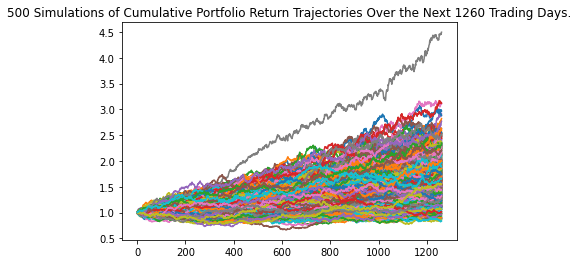

In [30]:
# Plot simulation outcomes
line_plot = MC_5_year.plot_simulation()

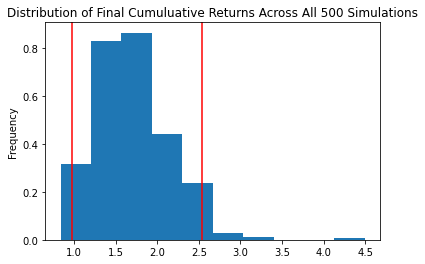

In [31]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_year.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5yr = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5yr)

count           500.000000
mean              1.696010
std               0.440663
min               0.839294
25%               1.389213
50%               1.653068
75%               1.951012
max               4.493350
95% CI Lower      0.974330
95% CI Upper      2.543335
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5yr[8]*initial_investment,2)
ci_upper_five = round(tbl_5yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58459.79 and $152600.08


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.5, 0.5],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000936,1.006251,0.997238,1.000842,0.984798,0.996566,1.000547,0.996807,1.001555,0.996157,...,1.000681,0.998200,0.981749,1.013613,0.997146,0.996137,0.999079,0.995505,1.003867,1.003264
2,0.997242,0.997554,0.998059,1.002589,0.979751,1.003873,0.993030,1.001927,1.001118,0.998980,...,1.006596,0.991661,0.980930,1.011635,1.003880,0.996362,1.000628,1.000483,1.004692,1.006207
3,0.995536,0.998079,0.982901,0.998350,0.977529,1.009669,1.002627,0.998847,1.004158,1.003392,...,1.011001,0.983284,0.991142,1.008111,1.000955,0.984157,1.005823,1.001068,1.007760,1.017568
4,1.003683,0.987419,0.990944,1.003018,0.977566,1.006650,1.006111,1.004115,1.006867,1.009217,...,1.019370,0.980600,0.989958,1.001977,1.007172,0.983936,1.003699,0.989433,1.016988,1.019644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.374223,3.099640,2.757376,4.297333,1.822966,2.666613,2.545001,2.535364,2.839935,3.117647,...,1.707578,2.701357,2.934341,2.222808,3.728463,1.602149,1.115236,2.320782,3.267440,2.029887
2517,1.380040,3.109034,2.768809,4.292547,1.829759,2.662837,2.541408,2.531096,2.842354,3.102270,...,1.711273,2.682325,2.917501,2.219361,3.722903,1.616802,1.105984,2.329035,3.277925,2.031365
2518,1.380062,3.083897,2.750019,4.267156,1.816885,2.669668,2.556851,2.522325,2.848829,3.109250,...,1.722599,2.663984,2.928673,2.214447,3.699567,1.613684,1.117269,2.346066,3.253342,2.045975
2519,1.372975,3.087007,2.775462,4.264575,1.820684,2.656884,2.588810,2.495028,2.816845,3.112529,...,1.722024,2.655153,2.916242,2.225280,3.700410,1.627941,1.124516,2.348187,3.279581,2.064949


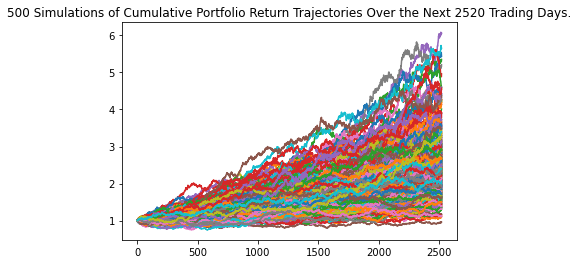

In [36]:
# Plot simulation outcomes
line_plot = MC_10_year.plot_simulation()

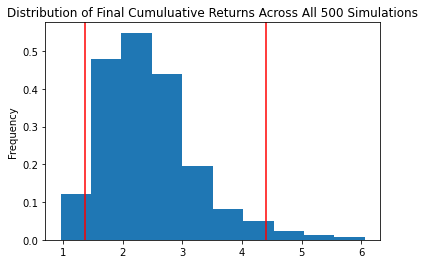

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_year.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10yr = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_10yr)

count           500.000000
mean              2.450220
std               0.780943
min               0.956937
25%               1.885448
50%               2.355987
75%               2.828381
max               6.061481
95% CI Lower      1.359788
95% CI Upper      4.401150
Name: 2520, dtype: float64


In [39]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10yr[8]*initial_investment,2)
ci_upper_ten = round(tbl_10yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $81587.27 and $264069.03
